In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

import pandas as pd

In [24]:
import json
from pprint import pprint

with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/output/part-00005 (1)') as data_file:    
    data = json.load(data_file)
    
result_act = pd.read_json(data["result_act"]).sort_index()
result_user = pd.read_json(data["result_user"]).sort_index()

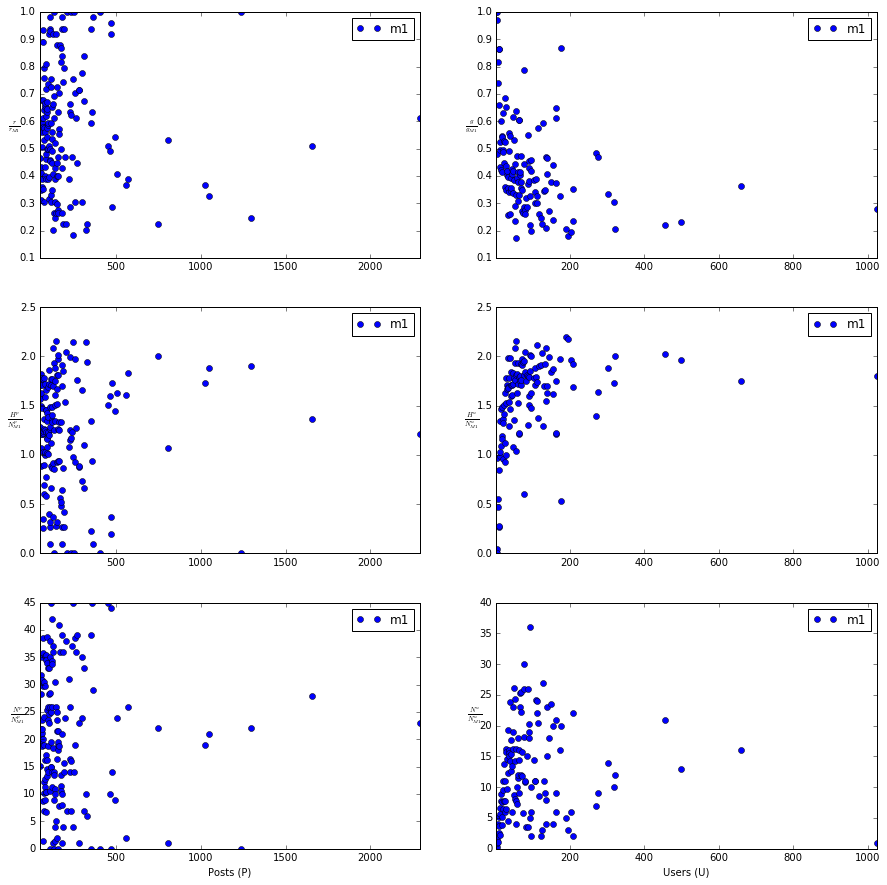

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15))

def ratio(n, w):
    if n == 0:
        return 0

    if w == 0:
        return 0

    return  n/w

def rowRatio(data):
    d = {
        "m1":ratio(data["m1"], data["m1"]),
        "m2":ratio(data["m2"], data["m1"]),
        "m3":ratio(data["m3"], data["m1"]),
        "m4":ratio(data["m4"], data["m1"])
    }
    return pd.Series(d)

usagedominance = result_act[["usagedominance"]]
usagedominance.columns = ['m1']

plts = usagedominance.plot(ax=axes[0,0], style='o')
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{r}{r_{M1}}$', rotation=0)

userusagedominance = result_user[["userusagedominance"]]
userusagedominance.columns = ['m1']
# userusagedominance = userusagedominance.apply(rowRatio,1)

plts = userusagedominance.plot(ax=axes[0,1], style='o')
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{g}{g_{M1}}$', rotation=0)

usageEntorpy = result_act[["usageEntorpy"]]
usageEntorpy.columns = ['m1']
# usageEntorpy = usageEntorpy.apply(rowRatio,1)

plts = usageEntorpy.plot(ax=axes[1,0], style='o')
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{H^p}{N_{M1}^p}$', rotation=0)

userUsageEntorpy = result_user[["userUsageEntorpy"]]
userUsageEntorpy.columns = ['m1']
# userUsageEntorpy = userUsageEntorpy.apply(rowRatio,1)

plts = userUsageEntorpy.plot(ax=axes[1,1], style='o')
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{H^u}{N_{M1}^u}$', rotation=0)

ActivateionExposure = result_act[["ActivateionExposure"]]
ActivateionExposure.columns = ['m1']
# ActivateionExposure.loc[:, 'm1'] = ActivateionExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()

plts = ActivateionExposure.plot(ax=axes[2,0], style='o')
plts.set_xlabel('Posts (P)')
plts.set_ylabel(r'$\frac{N^p}{N_{M1}^p}$', rotation=0)

UserExposure = result_user[["UserExposure"]]
UserExposure.columns = ['m1']
# UserExposure.loc[:, 'm1'] = UserExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()

plts = UserExposure.plot(ax=axes[2,1], style='o')
plts.set_xlabel('Users (U)')
plts.set_ylabel(r'$\frac{N^u}{N_{M1}^u}$', rotation=0)